In [2]:
import numpy as np


In [3]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import mean_absolute_error, accuracy_score
from keras.utils import to_categorical

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import mean_absolute_error, accuracy_score
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential



tf.random.set_seed(42)

# Define the data directories
train_data= r"C:\Users\Abirami\Desktop\ABI PRJCT\ML-face recognition\train"
test_data = r"C:\Users\Abirami\Desktop\ABI PRJCT\ML-face recognition\test"

# Define image size and batch size
img_size = (48, 48)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


# Load data
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Change the number of units to match the number of classes
])



# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#model summary
model.summary()
# Define callbacks
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('model_checkpoint.keras', save_best_only=True)
]
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

model.add(Dense(7, activation='softmax', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_split=0,
    validation_data=test_generator,
    callbacks=callbacks
)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,145,927 (4.37 MB)

 Trainable params: 1,145,927 (4.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 100s 108ms/step - accuracy: 0.1580 - loss: 6.0135 - val_accuracy: 0.1158 - val_loss: 5.5246
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 97s 108ms/step - accuracy: 0.1795 - loss: 5.9100 - val_accuracy: 0.0155 - val_loss: 9.1526
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 92s 102ms/step - accuracy: 0.1781 - loss: 6.0361 - val_accuracy: 0.1158 - val_loss: 11.3213
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 86s 96ms/step - accuracy: 0.1770 - loss: 5.9810 - val_accuracy: 0.1158 - val_loss: 7.0112
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.1763 - loss: 5.9902 - val_accuracy: 0.1158 - val_loss: 5.1865
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.1750 - loss: 5.9405 - val_accuracy: 0.1427 - val_loss: 7.4530
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.1772 - loss: 6.0664 - val_accuracy: 0.0155 - val_loss: 1.4139
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.1741 - loss: 6.06

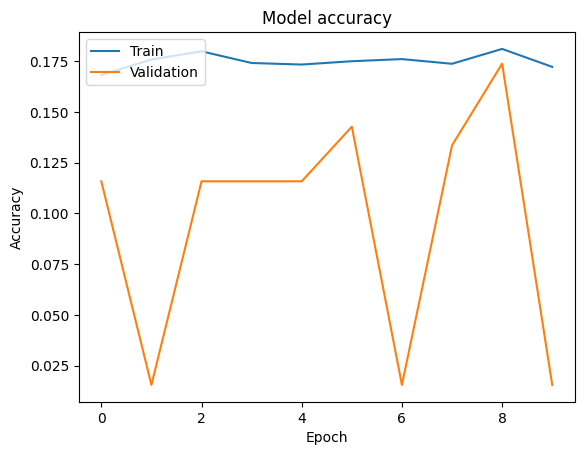

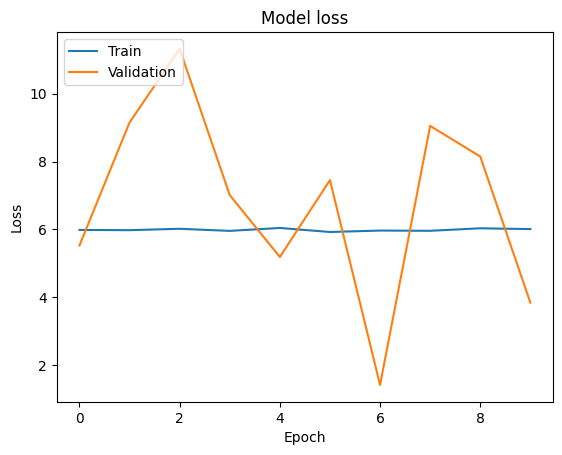

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.0302 - loss: 1.9783
Test Accuracy: 1.55%
Test Loss: 1.4139


In [15]:
from tensorflow.keras.models import load_model
model = load_model('/Users/Abirami/model_checkpoint.keras')

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess a new image
def preprocess_image(img_path, target_size=(48, 48)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

# Path to the new image
new_image_path = '/Users/Abirami/Training_10028230.jpg'
preprocessed_image = preprocess_image(new_image_path)

In [17]:
# Predict the class probabilities
predictions = model.predict(preprocessed_image)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# If you need class labels, use this:
class_labels = train_generator.class_indices  # Mapping from class names to indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse mapping
predicted_label = class_labels[predicted_class[0]]

print(f'Predicted Class: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
Predicted Class: disgust


In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Increase image size
img_size = (48, 48)

# Define the CNN model with more layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile the model with learning rate scheduler
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint('model_checkpoint.keras', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

C:\Users\Abirami\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 146s 153ms/step - accuracy: 0.2201 - loss: 2.0117 - val_accuracy: 0.3029 - val_loss: 1.7379 - learning_rate: 0.0010
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 116s 128ms/step - accuracy: 0.2884 - loss: 1.7415 - val_accuracy: 0.2634 - val_loss: 1.7217 - learning_rate: 0.0010
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 114s 126ms/step - accuracy: 0.3390 - loss: 1.6557 - val_accuracy: 0.3817 - val_loss: 1.5944 - learning_rate: 0.0010
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 124s 137ms/step - accuracy: 0.3886 - loss: 1.5782 - val_accuracy: 0.3210 - val_loss: 1.6495 - learning_rate: 0.0010
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - accuracy: 0.4075 - loss: 1.5232 - val_accuracy: 0.4295 - val_loss: 1.4597 - learning_rate: 0.0010
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 106s 118ms/step - accuracy: 0.4245 - loss: 1.4973 - val_accuracy: 0.4554 - val_loss: 1.4126 - learning_rate: 0.0010
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 113s 125ms/step - accura

In [19]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.4990 - loss: 1.3047
Test Accuracy: 51.04%
Test Loss: 1.2593


In [23]:
model.save('/Users/Abirami/Desktop/ABI PRJCT/ML-face recognition/face_recognition.keras')